<a href="https://colab.research.google.com/github/LinggarM/Movie-Synopsis-Text-Clustering/blob/main/pba_tugas_besar_movie_synopsis_text_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieve Data 

In [ ]:
import json
import requests

In [ ]:
# Get All Genres

genres = []
for i in range(1000) :
  url = ("https://api.themoviedb.org/3/movie/%d?api_key=63fea4c709da1f1496b7a1ca7a3c6083" % i)
  r = requests.get(url)
  json_data = json.loads(r.text)
  try:
    if (json_data['genres'] != "") :
      # print(json_data['genres'])
      for j in json_data['genres'] :
        genre = j.get('name')
        if (genre not in genres) :
          genres.append(genre)
  except Exception:
    pass
print(genres)

['Drama', 'Crime', 'Comedy', 'Action', 'Thriller', 'Documentary', 'Adventure', 'Science Fiction', 'Animation', 'Family', 'Romance', 'Mystery', 'Horror', 'Fantasy', 'War', 'Music', 'History', 'Western', 'TV Movie']


In [ ]:
len(genres)

19

In [ ]:
titles = []
synopsis = []

for i in range(100000) :
  url = ("https://api.themoviedb.org/3/movie/%d?api_key=63fea4c709da1f1496b7a1ca7a3c6083" % i)
  r = requests.get(url)
  json_data = json.loads(r.text)
  try:
    if (json_data['overview'] != "" and json_data['overview'] != "No overview found." and json_data['original_language'] == 'en') :
      titles.append(json_data['title'])
      synopsis.append(json_data['overview'])
      # print(json_data['original_language'], json_data['release_date'], json_data['id'], ". ", json_data['title'], " : ", json_data['overview'])
      # print("\n")
  except Exception:
    pass

In [ ]:
import pandas as pd

df_movies = pd.DataFrame({'title': titles, 'synopsis': synopsis})

In [ ]:
df_movies.head()

,title,synopsis
0,Four Rooms,It's Ted the Bellhop's first night on the job....
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J..."
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...
3,Star Wars,Princess Leia is captured and held hostage by ...
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp..."


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44096 entries, 0 to 44095
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44096 non-null  object
 1   synopsis  44096 non-null  object
dtypes: object(2)
memory usage: 689.1+ KB


In [ ]:
df_movies = df_movies.drop(df_movies.index[20000:], axis = 0)
df_movies

,title,synopsis
0,Four Rooms,It's Ted the Bellhop's first night on the job....
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J..."
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...
3,Star Wars,Princess Leia is captured and held hostage by ...
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp..."
...,...,...
19995,Vanishing on 7th Street,A mysterious global blackout yields countless ...
19996,"Joe Satriani - Live - The Grove in Anaheim, Ca...","Guitarist Joe Satriani playing In Anaheim, Cal..."
19997,Along the Great Divide,New Federal marshal Len Merrick saves Tim Keit...
19998,StarGaze HD: Universal Beauty,StarGaze HD brings the beauty and majesty of t...


In [ ]:
with open('/content/gdrive/MyDrive/Upload/movie_synopsis.csv', 'w') as f:
  df_movies.to_csv(f)

# Data Preprocessing

## 20000 Data

In [158]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [161]:
import pandas as pd

df_movies = pd.read_csv('/content/gdrive/MyDrive/Upload/Akademik/Tugas Besar PBA/movie_synopsis (1).csv', lineterminator='\n')
df_movies.head()

,Unnamed: 0,title,synopsis
0,0,Four Rooms,It's Ted the Bellhop's first night on the job....
1,1,Judgment Night,"While racing to a boxing match, Frank, Mike, J..."
2,2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...
3,3,Star Wars,Princess Leia is captured and held hostage by ...
4,4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp..."


In [165]:
df_movies = df_movies.drop(columns=['Unnamed: 0'])

In [166]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   synopsis  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df_movies['synopsis'].values) # training vector TF-IDF pada tiap data

# vector TF-IDF tiap kalimat (features), pasangan index kata dan nilainya
for i in features :
  print(i)
  print('-----------------------------')

Streaming output truncated to the last 5000 lines.
  (0, 45367)	0.07012602844716852
  (0, 20112)	0.14820114011184293
  (0, 15688)	0.11203967782977525
  (0, 45006)	0.14494951917364757
  (0, 27552)	0.10244445040398197
-----------------------------
  (0, 13472)	0.2490518624194644
  (0, 27064)	0.22792375085756703
  (0, 27394)	0.24003549284745643
  (0, 12706)	0.13678264249047523
  (0, 15040)	0.16824526334792805
  (0, 44383)	0.20815848067072426
  (0, 22022)	0.19615286464646087
  (0, 312)	0.2178831761869815
  (0, 21566)	0.18735001629418527
  (0, 4903)	0.37578276724344356
  (0, 44196)	0.19332954300480715
  (0, 18037)	0.14954012105880904
  (0, 23606)	0.19139158277652213
  (0, 5917)	0.17072057008128044
  (0, 6614)	0.1679838293591987
  (0, 39933)	0.21625863206129317
  (0, 22743)	0.1355139193251052
  (0, 27560)	0.18158572585154076
  (0, 7457)	0.1611340349293184
  (0, 14877)	0.14657339626088148
  (0, 23603)	0.14954012105880904
  (0, 33297)	0.149935166610894
  (0, 37929)	0.14801572309735853
  (0, 86

## 8000 Data

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd

df_movies_8000 = pd.read_csv('/content/gdrive/MyDrive/Upload/Akademik/Tugas Besar PBA/movie_synopsis_8000_no_overview.csv', lineterminator='\n')
df_movies_8000.head()

,Unnamed: 0,title,synopsis
0,0,Four Rooms,It's Ted the Bellhop's first night on the job....
1,1,Judgment Night,"While racing to a boxing match, Frank, Mike, J..."
2,2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...
3,3,Star Wars,Princess Leia is captured and held hostage by ...
4,4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp..."


In [ ]:
df_movies = df_movies.drop(columns=['Unnamed: 0'])

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   synopsis  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df_movies['synopsis'].values) # training vector TF-IDF pada tiap data

# vector TF-IDF tiap kalimat (features), pasangan index kata dan nilainya
for i in features :
  print(i)
  print('-----------------------------')

Streaming output truncated to the last 5000 lines.
  (0, 45367)	0.07012602844716852
  (0, 20112)	0.14820114011184293
  (0, 15688)	0.11203967782977525
  (0, 45006)	0.14494951917364757
  (0, 27552)	0.10244445040398197
-----------------------------
  (0, 13472)	0.2490518624194644
  (0, 27064)	0.22792375085756703
  (0, 27394)	0.24003549284745643
  (0, 12706)	0.13678264249047523
  (0, 15040)	0.16824526334792805
  (0, 44383)	0.20815848067072426
  (0, 22022)	0.19615286464646087
  (0, 312)	0.2178831761869815
  (0, 21566)	0.18735001629418527
  (0, 4903)	0.37578276724344356
  (0, 44196)	0.19332954300480715
  (0, 18037)	0.14954012105880904
  (0, 23606)	0.19139158277652213
  (0, 5917)	0.17072057008128044
  (0, 6614)	0.1679838293591987
  (0, 39933)	0.21625863206129317
  (0, 22743)	0.1355139193251052
  (0, 27560)	0.18158572585154076
  (0, 7457)	0.1611340349293184
  (0, 14877)	0.14657339626088148
  (0, 23603)	0.14954012105880904
  (0, 33297)	0.149935166610894
  (0, 37929)	0.14801572309735853
  (0, 86

# KMeans Model Training

In [218]:
from sklearn.cluster import KMeans

k = 19 # jumlah cluster
kmeans_model = KMeans(n_clusters = k, n_init = 3, max_iter = 500)
synopsis_clusters = kmeans_model.fit(features)

# Data Labelling

In [219]:
df_movies['label'] = synopsis_clusters.labels_
df_movies.head()

,title,synopsis,label
0,Four Rooms,It's Ted the Bellhop's first night on the job....,10
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",9
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,5
3,Star Wars,Princess Leia is captured and held hostage by ...,4
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",4


# Data Preview for each Cluster

In [239]:
clusters = df_movies.groupby('label')

for cluster in clusters.groups :
  print("Cluster %d : " % cluster)
  data_cluster = clusters.get_group(cluster)[['title','synopsis']]
  for i in range(5) :
    data = data_cluster.iloc[i]
    print('   ', data['title'], ': ', data['synopsis'])
  print('\n')

Cluster 0 : 
    9 Songs :  Matt, a young glaciologist, soars across the vast, silent, icebound immensities of the South Pole as he recalls his love affair with Lisa. They meet at a mobbed rock concert in a vast music hall - London's Brixton Academy. They are in bed at night's end. Together, over a period of several months, they pursue a mutual sexual passion whose inevitable stages unfold in counterpoint to nine live-concert songs.
    Almost Famous :  In 1973, 15-year-old William Miller's unabashed love of music and aspiration to become a rock journalist lands him an assignment from Rolling Stone magazine to interview and tour with the up-and-coming band Stillwater.
    Tenacious D in The Pick of Destiny :  In Venice Beach, naive Midwesterner JB bonds with local slacker KG and they form the rock band Tenacious D. Setting out to become the world's greatest band is no easy feat, so they set out to steal what could be the answer to their prayers... a magical guitar pick housed in a rock

# Save All Data from each Cluster

In [224]:
clusters = df_movies.groupby('label')

for cluster in clusters.groups :
    f = open('cluster'+str(cluster)+ '.csv', 'w') # buat file csv untuk tiap cluster
    data = clusters.get_group(cluster)[['title','synopsis']] # judul dan sinposis tiap data pada tiap cluster
    f.write(data.to_csv(index_label='id')) # simpan ke csv
    f.close()

# Feature Names of each Cluster

In [225]:
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1] # diurutkan berdasarkan indeks -> lalu di-reversed
terms = vectorizer.get_feature_names()
n_terms = 10

for i in range(k) :
	print("Cluster %d :" % i)
	for j in order_centroids [i, :n_terms] :
		print('   %s' % terms[j])
	print('----------')

Cluster 0 :
   live
   band
   dvd
   album
   concert
   tour
   recorded
   rock
   music
   songs
----------
Cluster 1 :
   school
   high
   student
   students
   new
   teacher
   girl
   friends
   girls
   year
----------
Cluster 2 :
   life
   young
   old
   love
   time
   finds
   new
   year
   years
   wife
----------
Cluster 3 :
   island
   remote
   tropical
   group
   shipwrecked
   long
   treasure
   young
   soon
   pacific
----------
Cluster 4 :
   young
   time
   wife
   help
   friends
   group
   way
   old
   father
   finds
----------
Cluster 5 :
   film
   documentary
   movie
   films
   director
   star
   horror
   feature
   life
   series
----------
Cluster 6 :
   new
   york
   city
   adult
   young
   old
   life
   year
   friends
   love
----------
Cluster 7 :
   war
   ii
   world
   american
   vietnam
   soldiers
   civil
   german
   army
   british
----------
Cluster 8 :
   people
   lives
   group
   world
   young
   life
   city
   time
 

Cluster: 0


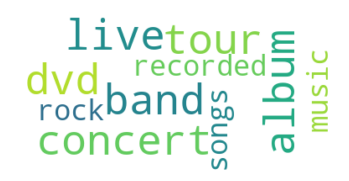

Cluster: 1


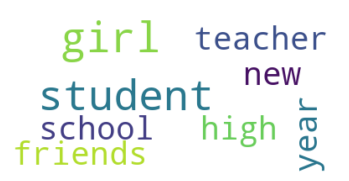

Cluster: 2


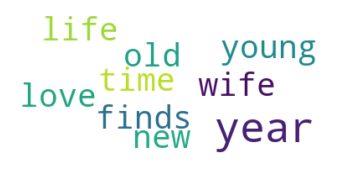

Cluster: 3


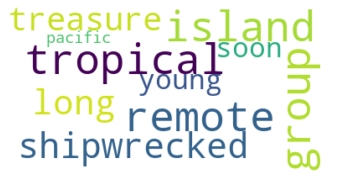

Cluster: 4


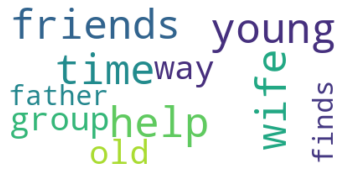

Cluster: 5


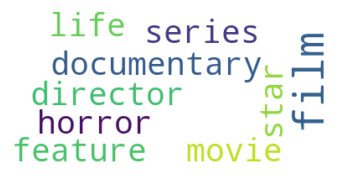

Cluster: 6


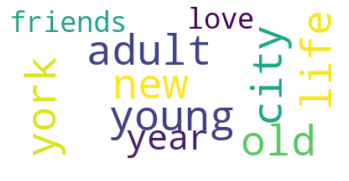

Cluster: 7


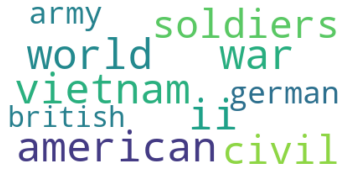

Cluster: 8


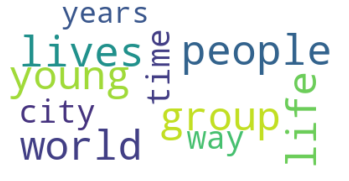

Cluster: 9


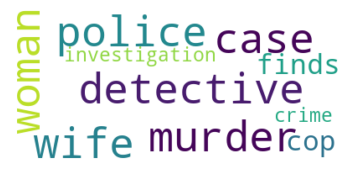

Cluster: 10


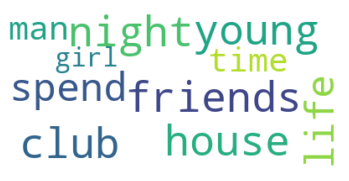

Cluster: 11


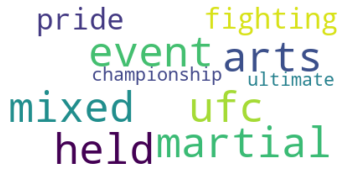

Cluster: 12


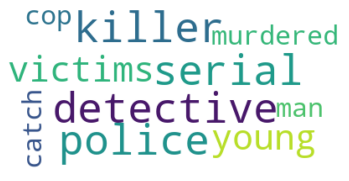

Cluster: 13


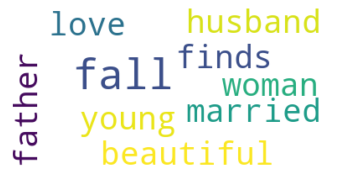

Cluster: 14


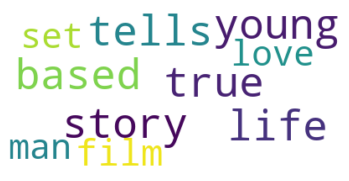

Cluster: 15


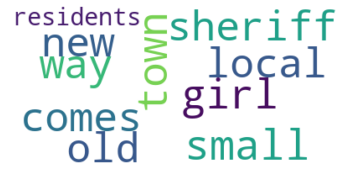

Cluster: 16


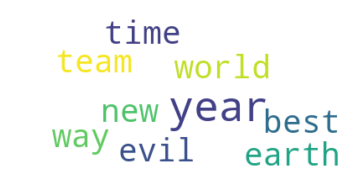

Cluster: 17


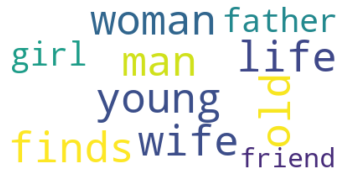

Cluster: 18


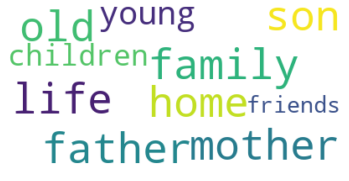

In [228]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

c = []
keywords = []
for i in range(k) :
  c.append(i)
  key = ""
  for j in order_centroids [i, :n_terms] :
    key = key+(" ")+(terms[j])
  keywords.append(key)

for i in range(k) :
  print('Cluster: %d' % c[i])
  text = keywords[i]
  wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()


# Predict Sentences

In [240]:
Sentence = ["He was murdered by a killer"]
Y = vectorizer.transform(Sentence)
prediction = kmeans_model.predict(Y)
cluster_prediction = prediction[0]
print("Sentence           : ", Sentence[0])
print("Cluster predicted  : ", cluster_prediction)

Sentence           :  Humanity finds a mysterious object buried beneath the lunar surface and sets off to find its origins with the help of HAL 9000, the world's most advanced super computer.
Cluster predicted  :  16


In [241]:
Sentence = ["Johnstone's Family is very nice family"]
Y = vectorizer.transform(Sentence)
prediction = kmeans_model.predict(Y)
cluster_prediction = prediction[0]
print("Sentence           : ", Sentence[0])
print("Cluster predicted  : ", cluster_prediction)

Sentence           :  Johnstone's Family is very nice family
Cluster predicted  :  18


In [243]:
Sentence = ["There are a lot of planets and stars in space"]
Y = vectorizer.transform(Sentence)
prediction = kmeans_model.predict(Y)
cluster_prediction = prediction[0]
print("Sentence           : ", Sentence[0])
print("Cluster predicted  : ", cluster_prediction)

Sentence           :  There are a lot of planets and stars in space
Cluster predicted  :  4


# Evaluation

## Silhouette Score

In [244]:
from sklearn.metrics import silhouette_score

# nilai silhouette score antara -1 dan 1, semakin tinggil semakin bagus
print(f'Silhouette Score : {silhouette_score(features, labels = synopsis_clusters.labels_)}')

Silhouette Score : 0.004116605001901183


## Elbow Method (SSE)

In [245]:
SSE = []
K = range(5,19)
for k in K:
  kmeans_model = KMeans(n_clusters = k).fit(features)
  SSE.append(kmeans_model.inertia_)

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Data Visualization

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [ ]:
import seaborn as sns

sns.scatterplot(Z[0],Z[1])
sns.scatterplot(Z[0],Z[1],hue=label)